## Introduction to Python basic syntax - 02

We will move from basic syntax to the powerful libraries that make Python the language of choice for scientific computing and data analysis.

### About this Notebook
We will learn how to work with packages in Python and explore some of the important packages of the scientific Python ecosystem.

Covered packages in this notebook:
- some built-in Python packages (**random, math ...**)
- **NumPy**: Numerical Python for high-performance numerical operations on arrays.
- **scikit-image**: For reading, writing, and processing images.
- **Matplotlib**: For creating publication-quality plots and visualizations.

---
### Lesson 1: Importing Packages

In Python, packages (libraries) are collections of pre-written code (modules) that include functions, classes, and variables designed to help with specific tasks. 

Before you can use them, you need to import the libraries. For that we use the `import` keyword. 

```python
import package_name
```

**Conventions**:
- We usually import packages at the very top of the notebook/script.
- We give packages a shorter 'alias' to make our code cleaner - some common aliases are `np` for NumPy or `pd` for pandas.
- It is common to import only the parts of a package you need, rather than the whole thing.
- Avoid using package`s names with your own variables/functions.
    ```python
    
    import numpy as np
    np = 20 # This is a bad practice as it shadows the 'np' library
    ```

In [ ]:
# Import the entire `random` library under its full name.
import random
# To use it: random.function_name()

# Import the `numpy` library and give it an alias 'np'.
import numpy as np
# To use it: np.function_name()

# Import only specific modules or functions (`io`, `filters`) from the `skimage` package.
from skimage import io, filters
# To use them: io.function_name(), filters.function_name()

In [ ]:
# If you try to import a package that is not installed or if you have a typo,
# Python will raise a ModuleNotFoundError.

import pillow as pil

---
---
### Lesson 2: Working with Packages 

Objects in Python have attributes (data or properties about the object) and methods (functions that belong to the object).

We access them using dot notation: object.attribute or object.method().

You can use the built-in dir() function to see a list of all available attributes and methods for an object.

In [ ]:
import random
print(dir(random))

In [ ]:
# We use . to access methods and attributes of an object.
# Example use of the random library to simulate rolling two six-sided dice 10 times

for i in range(10):
    dice_roll = random.randint(1,6) # randint is a method of the random library
    print(dice_roll, end=', ')

#### --- Important skill: How to get help ---
- Ways to get help in Jupyter Notebooks:
    - Use the help() function: help(np.mean)
    - Use the ? operator for a quick summary: np.mean?
    - Use the ?? operator to see the source code: np.mean??
    - Hover over the function name with your mouse cursor.
- Official documentation - e.g. for **NumPy:** [https://numpy.org/doc/stable/](https://numpy.org/doc/stable/)
- Forums like Stack Overflow are also very useful.

In [ ]:
import numpy as np
help(np.mean)

In [ ]:
np.mean?

In [ ]:
np.mean??

In [ ]:
from skimage import io
print(io.__doc__)

##### --- ***Exercise*** ---

Import library `math` and use it to calculate squared root of defined varible **value**.


In [ ]:
value = 135

# Your code here...

---
---

#### Lesson 3: NumPy

NumPy (Numerical Python) is an essential library in the Python data science ecosystem.

It can handle large multidimensional arrays and matrices.

---

** NumPy arrays vs. Python lists:**

Python lists:
- can store elements of different types
- available without imports
- slow for numerical computation: operations over many elements require Python loops

NumPy Arrays:
- all elements share the same data type
- fast numerical operations: fast and efficient vectorized operations 

In [ ]:
import numpy as np

my_list = [1, 2, 3, 4, 5]
my_array = np.array(my_list)

print("This is a Python list:", my_list)
print("This is a NumPy array:", my_array)
print("The type of the array is:", type(my_array))


In [ ]:
# --- Array Math (Vectorization) ---
# This is NumPy's superpower. No for loops needed!

# Let's try to add 10 to every element.
# With a list:
list_result = []
for item in my_list:
    list_result.append(item + 10)
print("List result (with loop):", list_result)

# With a NumPy array:
array_result = my_array + 10
print("Array result (no loop!):", array_result)

In [ ]:
# Compare how long it takes to add 1 to all values of list/numpy array

py_list = list(range(1000))
np_array = np.array(py_list)

# Timing Python list (loop)
%timeit [item + 1 for item in py_list]

# Timing NumPy array (vectorized)
%timeit np_array + 1

**Why NumPy for images**
- Images are essentially arrays of numbers
    - each pixel corresponds to a numerical value that represents the measured signal 
- In microscopy and other scientific imaging, an image can be thought of as a 2D array (for a single channel) or a 3+D array when dealing with color channels, z-stacks, or time series.

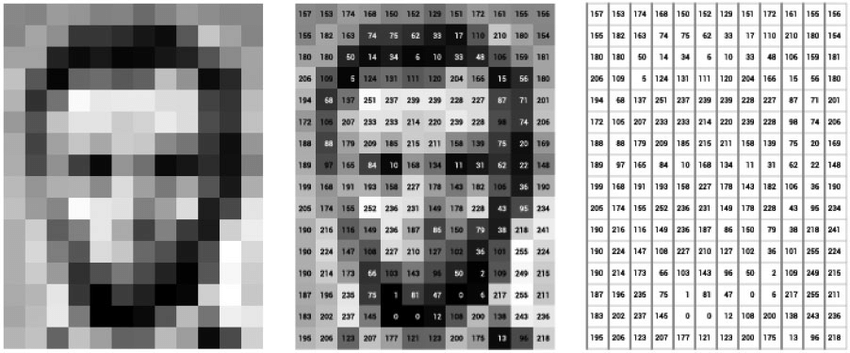

[doi link](10.1093/llc/fqy085)

**Multi-dimensionality & array operations**

##### 2D arrays (matrices)

In [ ]:
# NumPy arrays can be multi-dimensional

# A 2D array is a matrix
array_2d = np.array([[1, 2, 3], [4, 5, 6]])
print("2D Array:\n", array_2d)

In [ ]:
# Same vectorized operations apply to 2D arrays without any code changes.
# --- Scalar operations ---
array_plus_10 = array_2d + 10
array_times_2 = array_2d * 2

print(array_plus_10)
print()
print(array_times_2)

In [ ]:
# --- Element-wise array–array operations ---
array_sum = array_2d + array_2d
array_product = array_2d * array_2d  # element-wise multiplication

print('array sum: ', array_sum)
print()
print('array product', array_product)

In [ ]:
# Indexing and slicing in 2D arrays: [row, column]
# reminder: Python indexing strats from 0

print("Input 2d array:\n", array_2d, '\n')

print(array_2d[1, 2],  " -- element at 2nd row, 3rd column\n")

print(array_2d[0, :],  " -- first row\n") # all columns of the first row

print(array_2d[:, 1], " -- second column") # all rows of the second column

print(array_2d[0:2, 0:2], " -- sub-array (first two rows, first two columns)\n")


In [ ]:
# The :: operator is shorthand for step slicing:
arr = np.arange(10)  # [0 1 2 3 4 5 6 7 8 9]

print(arr)
print(arr[::2])   # Every 2nd element -> [0 2 4 6 8]
print(arr[1::2])  # Every 2nd element starting at index 1 -> [1 3 5 7 9]
print(arr[::-1])  # Reverse array -> [9 8 7 6 5 4 3 2 1 0]
print(arr[::-2])  # Every 2nd element in reverse array -> [9 7 5 3 1]

In [ ]:
# in 2D arrays
matrix = np.array([
    [1, 2, 3, 4],
    [5 , 6, 7, 8],
    [9, 10, 11, 12]
    ])

print(matrix)
print()
print(matrix[::2, ::2])

##### --- ***Exercises*** ---

Try to solve these slicing and indexing operations on given 1D array:
- Get every 3rd element.
- Get every other element from index 5 to 15 (including).
- Reverse the array.

In [ ]:
arr_1d = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35, 40, 45, 50])

# your code here

<details>
<summary>Click to see the example solution</summary>

```python
print(
    arr_1d[::3],
    arr_1d[5:16:2],
    arr_1d[::-1],
    sep='\n'
)
```

Try to solve these requests by slicing and indexing operations on given 2D array:
- Extract the first column.
- Extract the last row.
- Get the 2×2 block in the center.
- Get every other row.

In [ ]:
arr_2d = np.array([
    [ 1, 10, 20, 30],
    [-1, 11, 22, 30],
    [ 1, 33, 44,  6],
    [-1, -1, -1, -1]
])

# your code here


<details>
<summary>Click to see the example solution</summary>

```python
print(
    arr_2d[:, 0],
    arr_2d[-1, :],
    arr_2d[1:3, 1:3],
    arr_2d[::2, :],
sep='\n'
)
```

<br><br>

##### More than 2 dimensions

In [ ]:
# You can have arrays with more than 2 dimensions.
array_3d = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print("3D Array:\n", array_3d)

In [ ]:
# Accessing an element in 3D array

print("All z-axis slices at position (1st row, 2nd column):")
print(array_3d[:, 0, 1])   # returns a 1D array along depth

print("\nSingle value at (2nd slice, 1st row, 2nd column):")
print(array_3d[1, 0, 1])   # returns a scalar

print("\nFull 2nd slice:")
print(array_3d[1, :, :])   # returns a 2D array

<br><br>

**NumPy methods and attributes:**

Key attributes:
- `.shape`: Returns a tuple representing the dimensions of the array (e.g., rows and columns for 2D arrays).
- `.size`: Returns the total number of elements in the array.
- `.dtype`: Returns the data type of the elements in the array (e.g., int32, float64).

Difference between type() and .dtype:
- `type()`: This function returns the type of the object itself. For example, if you have a NumPy array, `type()` will return `<class 'numpy.ndarray'>`, indicating that the object is a NumPy array.
- `.dtype`: This attribute is specific to NumPy arrays and indicates the data type of the array elements.

Initializing arrays:
- `np.zeros((shape))`: Creates an array of the given shape, filled with zeros.
- `np.ones((shape))`: Creates an array of the given shape, filled with ones.
- `np.random.rand(shape)`: Creates an array of the given shape, filled with random floats between 0 and 1.
- `np.arange(start, stop, step)`: Creates a 1D array with values from start to stop (exclusive) with a given step.

In [ ]:
# Create an array of zeros. This is useful for creating a blank image.
blank_image = np.zeros(shape=(8, 12), dtype='uint8') # 8 rows (height), 12 columns (width)
blank_image
#print(blank_image)

In [ ]:
print("Shape of the blank image:", blank_image.shape)
print("Data type:", blank_image.dtype)
print("Total number of pixels (size):", blank_image.size)

<br><br>
**NumPy Data Types (dtypes)**

NumPy arrays have a data type (dtype) that determines what kind of values they can hold and how much memory each element uses. 

Choosing the right dtype is important for memory efficiency and correct computations, especially with large images or datasets.


*Notes for Image Analysis:*
- Images are often uint8 or uint16 = pixel values ranges from 0–255 or 0-65535.
- For calculations (e.g., averaging, filtering), it’s common to convert to float32 to avoid overflow or rounding errors.
- Label masks (e.g., segmented objects) often use int32 because you may have thousands of objects.
- Boolean arrays are great for masks and logical operations.

| dtype      | Description | Range / Notes | Typical Use |
|------------|-------------|---------------|-------------|
| `uint8`    | Unsigned 8-bit integer | 0 to 255 | Most common for grayscale images, such as single-channel images in microscopy. |
| `uint16`    | Unsigned 16-bit integer   | 0 to 65,535 | Used for higher dynamic range images. |
| `int32`    | Signed 32-bit integer   | -2,147,483,648 to 2,147,483,647 | Useful for counting objects, labels, or intermediate calculations in image analysis. |
| `float32`  | 32-bit floating point   | ~±3.4e38, 7 decimal digits precision | Common for image processing, computations with intensity values, or storing probabilistic /normalized data. |
| `bool`     | Boolean                 | `True` / `False` | Often used for masks, binary images, or filtering conditions. |


**Bit depth of images**

= how many discrete intensity values a pixel can store

A look up table (LUT) / colormap is just a mapping of of these discrete values to a displayed color/shade.

For example: 
- 1-bit image = 2**1 discrete values (2), 0 and 1, black and white in grayscale (or any two colors, depending on the LUT)
- 3-bit image = 2**3 discrete values (8), 0 to 7, binary representations: [000, 001, 010, 011, 100, 101, 110, 111]

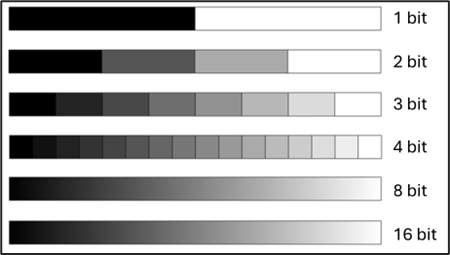

<br><br>
**NumPy Statistics**

Numpy offers comprehesive list of mathematical functions that can be applied to arrays.

Examples:
- `np.mean()`, `np.median()`, `np.std()`, `np.sum()`, `np.min()`, `np.max()`
- `np.sin()`, `np.cos()`, `np.exp()`, `np.log()`, `np.sqrt()`

In [ ]:
# Generate an array of random intensity values simulating a small image region
random_array = np.random.rand(100, 100) * 255 # 100x100 array with values 0-255

# Calculate basic statistics on the entire array
print("Mean:", np.mean(random_array))
print("Median:", np.median(random_array))
print("Standard deviation:", np.std(random_array))
print("Sum of all elements:", np.sum(random_array))
print("Maximum value", np.max(random_array))

In [ ]:
angles = np.array([0, np.pi/2, np.pi])
print(angles)
print("Sine of angles:", np.sin(angles))
print("Cosine of angles:", np.round(np.cos(angles)))

##### --- ***Exercise*** ---

You are given two NumPy arrays representing the background intensity and the raw signal from an experiment. To get the real signal, you must perform background subtraction.

1. Calculate the mean of the background array.
2. Subtract this mean background value from the raw_signal array to get the corrected_signal array.
3. Print the element from the corrected_signal located at the 2nd row, 3rd column.
4. Find out the difference between brightest and dimmest signal (max-min).

In [ ]:
background = np.array([[10, 12, 11],
                       [11, 10, 12],
                       [12, 11, 10]])

raw_signal = np.array([[55, 67, 88],
                       [58, 69, 94],
                       [51, 62, 83]])

# Your code here

<details>
<summary>Click to see the example solution</summary>

```python
bg_mean = np.mean(background)
print(bg_mean)

corrected_signal = raw_signal-bg_mean
print(corrected_signal)

print(corrected_signal[1,2])

max = np.max(corrected_signal)
min = np.min(corrected_signal)
diff = max - min

print(diff)
```

---
---
### Lesson 5: scikit-image & Matplotlib

#### scikit-image - Image Processing in Python

We have learned that we can work with images as NumPy arrays. On top of that, there are dedicated image-processing packages that provide useful functions for various tasks. For example *Pillow, imageio, OpenCV2, scikit-image*.

During this course, we will mailny use **scikit-image** (imported as `skimage`). 

It provides a wide range of algorithms for reading/writing, manipulating, and analyzing images. These functionalities are organized into modules, and we typically import only the functions or submodules needed for a particular task.


Example modules in `skimage`
- `io`: Reading and writing images in different formats (imread, imsave..)
- `filters`: Image filtering and enhancement (e.g., gaussian, sobel, threshold_otsu)
- `measure`: Object measurements and region properties (e.g., label, regionprops)


You can access the full documentation and tutorials here: [scikit-image documentation](https://scikit-image.org/docs/stable/)


#### Matplotlib - plotting data

It is a general purpose plotting library for visualizing many types of data, from simple line plots to complex scientific multi-panel figures.

Documentation: [Matplotlib Pyplot API](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)


To access main plotting functions we import the following:

```python 
import matplotlib.pyplot as plt
```

For plotting images, the main function is `imshow`.

In [ ]:
# We'll use skimage io module to read an image as a NumPy array.

from skimage import io
loaded_image = io.imread('https://fiji.sc/samples/blobs.png')

# Let's inspect the characteristics
print("The type of our image is:", type(loaded_image))
print("Image shape (height, width):", loaded_image.shape)
print("Image data type (bit depth):", loaded_image.dtype)

In [ ]:
# We can display images using the imshow function
import matplotlib.pyplot as plt

# We need to reorder axes or get rid of the redundant axis
image = np.squeeze(loaded_image)

# Plot image
plt.imshow(image, cmap='gray') 

In [ ]:
# Modified version of the image.
# We can do math on the image because it is a NumPy array!
# Let's add some uniform signal.
new_image = image + 80

plt.imshow(new_image, cmap='gray') # it looks weird

In [ ]:
# Warning: The image is uint8, so pixel values above 255 will overflow!

# Check dtype and max value
print("Original dtype:", image.dtype)
print("Original max pixel value:", image.max())


# Check dtype and max value after signal addition
print()
print("Modified dtype:", new_image.dtype)
print("Modified max pixel value:", new_image.max())

In [ ]:
# For proper brightness adjustment, convert to float first
image_float = image.astype(np.float32) # conversion function
new_image_float = image_float + 80
print("Max pixel value:", new_image_float.max())

# Plot
plt.imshow(new_image_float, cmap='gray')

In [ ]:
## To save the modified image, we can use skimage io.imsave

io.imsave('modified_image.tif', new_image_float)

# or specify path
io.imsave('../outputs/modified_image.tif', new_image_float)

In [ ]:
# We can control the plot options to show the image in a nicer way

# Example recipe for a plot:
plt.figure(figsize=(6, 6)) # Create a figure of a specific size
plt.imshow(image, cmap='plasma') # The figure contents
plt.title("Image of Blobs without axes") # Set the title
plt.axis('off') # Control axis
plt.show() # Display the plot


Try to change the colormap (lookup table) in the previous plot.

This [link](https://matplotlib.org/stable/users/explain/colors/colormaps.html) will lead you to available colormaps. 

Or you can print the list with code below.

In [ ]:
# Here are available predefined colormaps
print(plt.colormaps())

### Side-by-Side Image Comparison with Matplotlib

Sometimes we want to **show more images simultaneously**. For example to see the effect of processing steps, such as background adjustment, normalization, or filtering.  

Matplotlib allows us to display multiple images/graphs in the same figure using **subplots**.

```python
# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns

# axes is now a 2x3 NumPy array
# You can access each subplot using indexing
axes[0, 0].plot(x, y)
axes[0, 1].imshow(image1, cmap='gray')
axes[1, 0].imshow(image2, cmap='plasma')

# Each Axes has its own titles, labels, limits, and legends
# You can customize each subplot independently
axes[1, 0].set_title("Higher Background Image")

plt.show()
```

*Note: Flattening the axes array (optional)*

If you prefer 1D indexing instead of [row, col], you can flatten the axes array just as here:
```python
axes_flat = axes.flatten()
axes_flat[0].plot(x, y)
axes_flat[5].imshow(image2)
```

In [ ]:
# Let's plot the original and the modified images side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # 1 row, 2 columns of plots

axes[0].imshow(image, cmap='hot', vmin=0) # 
axes[0].set_title("Original Image")

axes[1].imshow(new_image_float, cmap='hot', vmin=0)
axes[1].set_title("Higher Background Image")

plt.show()

**Plotting other types of data**

So far we have visualized images with `imshow`, but **Matplotlib** can also create standard scientific plots, such as:

- Line plots (time series, functions, growth curves)
- Scatter plots (correlation between two measurements)
- Bar charts (grouped comparisons)
- Histograms (distribution of pixel intensities or measurements)

All of these are done with functions from the **`matplotlib.pyplot`** module, most commonly `plt.plot()`.  

Each plot typically has the following structure:
1. **Prepare the figure**  
   `plt.figure(figsize=(width, height))` → controls size/aspect ratio.  
2. **Plot the data**  
   `plt.plot(x, y, ...)` → styles can include color, line type, markers, labels.  
3. **Customize the plot**  
   Add title, axis labels, grid, legend.  
4. **Save the figure (optional)**  
   Use `plt.savefig("filename.png", dpi=300)` for publication-quality output.  
5. **Show the figure**  
   `plt.show()` displays it in the Notebook or from a script.

In [ ]:
# Let's create a customized plot and save it.

plt.figure(figsize=(6, 4)) # Control the size and aspect ratio

x = np.linspace(0, 10, 30) # Creates 1D array from 0 to 10 with 30 evenly spaced elements
y = x**2

plt.plot(x, y, 
         color='firebrick',         # Change the color
         linestyle='--',            # Set line style
         linewidth=0.75,            # Set the line thickness
         marker='o',                # Add circular markers
         markersize=4,              # Set marker size
         markerfacecolor='white',   # Fill color
         markeredgecolor='black',   # Edge color
         markeredgewidth=0.5,       # Edge width
         label='y = x^2')           # Add a label for the legend

plt.title("A Very Nice Plot", fontsize=16) # Set plot title and parameters
plt.xlabel("X-axis values", fontsize=12) # Set axis title and parameters
plt.ylabel("Y-axis values", fontsize=12) # Set axis title and parameters
plt.grid(True, linestyle=':', alpha=0.6) # Add a subtle grid
plt.legend() # Display the legend (label)

# Save the figure
plt.savefig("../outputs/my_beautiful_plot.png", dpi=300)

plt.show()

---
---

## ✏️ Practice Lesson
Time to put everything into practice! Try to solve the following problems in the cells below.


### Exercise 1: NumPy practice

Print all intermediate results.

1. Create a **1D NumPy arra of type uint8** containing the values `10, 20, 30, 40, 50`.  
2. Create a new array by subtracting `15` from the array and find out its maximum value - is it what you would expect? 
3. Create another new array by **squaring every element** of the original array, but **make sure to avoid overflow**.
   *Hint: convert to a larger integer type before squaring*
4. Slice the original array to extract only the **first three elements**.  
5. Change the **last two elements** of the original array to 0.

In [ ]:
# Your code here...

<details>
<summary>Click to see the example solution</summary>

```python
# 1. Create an 8-bit 1D NumPy array
arr = np.array([10, 20, 30, 40, 50], dtype=np.uint8)
# arr = np.arange(10,60,10).astype(np.uint8) # alternative
print("Original array:", arr)

# 2. Subtract 15
subtracted = arr - 15
print("After subtracting 15:", subtracted)
print("Maximum value after subtraction:", subtracted.max())
print("Maximum value after subtraction:", np.max(subtracted)) # alternative solution

# 3. Square every element of the original array safely (avoid overflow)
squared = arr.astype(np.int16) ** 2
print("Squared array:", squared)

# 4. Slice first three elements
first_three = arr[:3]
print("First three elements:", first_three)

# 5. Change last two elements to 0
arr[-2:] = 0
print("Modified array", arr)
```

### Exercise 2: Simple Plotting

Let's plot the relationship: y = sinh(x)

1. Create a NumPy array `x` with at least 10 values in range `(-5, 5)`.
2. Create a NumPy array `y` using the hyperbolic sine of `x` (`np.sinh(x)`).
3. Use `matplotlib.pyplot` to create a **line plot** of `y` versus `x`.
4. Add a legend `"y = sinh(x)"` and labels for the x and y axes.
5. Display the plot.

In [ ]:
# Your code here...


<details>
<summary>Click to see the example solution</summary>

```python
# 1. Create an array x with values from -5 to 5
x = np.linspace(-5, 5, 100)

# 2. Compute y = sinh(x)
y = np.sinh(x)

# 3. Plot y versus x
plt.figure(figsize=(6, 4))
plt.plot(x, y, label="y = sinh(x)", color='teal')

# 4. Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# 5. Display the plot
plt.show()
```

### Exercise 3: Image Processing

1. Load the image `mouse_liver_roi.tif` from the folder `data/` and find out its dimensions (shape).
2. Calculate the **average (mean) pixel intensity** of the entire image and print it.  
3. Calculate the **minimum and maximum pixel intensity**.  
4. **Normalize** the image so that pixel values are in the range `[0, 1]`. 
5. Plot the **normalized image** using a colormap of your choice and hide axes.  
    - *Optional*: plot also colorbar with 'plt.colorbar()'

*Hint: For normalization convert the image to float first, then subtract minimum and divide by the maximum.* 


In [ ]:
# Your code here...

<details>
<summary>Click to see the example solution</summary>

```python
# 1. Load the image
path_to_image = '../data/mouse_liver_roi.tif'
image = io.imread(path_to_image)
print(image.shape)

# 2. Compute mean pixel intensity
mean_intensity = np.mean(image)
print(f"Mean intensity: {mean_intensity:.2f}")

# 3. Compute min and max pixel intensity
min_intensity = np.min(image)
max_intensity = np.max(image)
print(f"Min intensity: {min_intensity}, Max intensity: {max_intensity}")

# 4. Normalize to [0, 1]
image_float = image.astype(float)
normalized = (image_float - min_intensity) / (max_intensity - min_intensity)

# 5. Plot normalized image
plt.figure(figsize=(5, 5))
plt.imshow(normalized, cmap="managua")
plt.colorbar(fraction=0.045)
plt.axis("off")
plt.show()
```

### Exercise 4: Adding a Scale Bar

1. Install the package [matplotlib_scalebar](https://pypi.org/project/matplotlib-scalebar/).  
   - Remeber how to install packages into your environment or check the example solution below.
   - *Note:* You will likely need to restart the kernel before using it. Restarting resets all imports and variables.

2. Load the image `mouse_liver_roi.tif` from the folder `data/`.

3. Using *matplotlib* together with *matplotlib_scalebar*, plot the demo image with a scale bar.  
   - Assume the pixel size is 20 nanometers.


*Hints:*
- Don’t forget to import the necessary packages: `skimage.io`, `matplotlib.pyplot` and `matplotlib_scalebar.scalebar.ScaleBar`.  
- Check the official documentation of `matplotlib_scalebar` for info how to add and customize the scale bar.


In [ ]:
# Your code here...

<details>
<summary>Click to see the example solution</summary>

Install the package in your environment.

A) Inside conda terminal and activated environment type:
```bash
pip install matplotlib-scalebar
```

B) Install directly from notebook:
```python
!pip install matplotlib-scalebar
```
<br><br>

```python
from skimage import io
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar # first make you sure you have it

# 1. Load the image
image = io.imread("../data/mouse_liver_roi.tif")

# 2. Plot the image
fig, ax = plt.subplots()
ax.imshow(image, cmap="gray")
ax.axis("off")

# 3. Add a scale bar
scalebar = ScaleBar(20, "nm", location="lower right", color="black", box_alpha=0.6)
ax.add_artist(scalebar)

plt.show()
```
